# LOAN CLASSIFIER

## Dataset provides information about loan of 346 customers

### Developed various models and evaluated accuracy of each model

### IMPORTING NEEDED PACKAGES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import itertools
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

### IMPORT DATA:

In [2]:
filename='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'
df=pd.read_csv(filename)
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


### Information about each column:

#### loan_status: Will reflect whether a loan is paid or not
#### Principal: Basic principal loan amount
#### terms: Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
#### effecctive_date: When did the loan got originated
#### due_date: One time pay-off Due date
#### age: Age of applicant
#### education: Education of applicant
#### gender: Gender of applicant

### Dataset contains information about 346 customers whose loan already paid off or defaulted

In [3]:
df.shape

(346, 10)

### Checking out the Datatypes of each column:

In [4]:
print(df.dtypes)

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object


### Descriptive exploration of Data:

In [5]:
df.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [6]:
#dropping columns Unammed: 0 and Unnamed: 0.1
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


### Checking if any column has null values:

In [7]:
df.isnull().sum()
#Output shows that there are no empty values

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

### Checking for any Duplicate entries:

In [8]:
print(df.duplicated().sum())
df=df.drop_duplicates()
df.info()

40
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 345
Data columns (total 8 columns):
loan_status       306 non-null object
Principal         306 non-null int64
terms             306 non-null int64
effective_date    306 non-null object
due_date          306 non-null object
age               306 non-null int64
education         306 non-null object
Gender            306 non-null object
dtypes: int64(3), object(5)
memory usage: 21.5+ KB


### Convert to datetime object:

In [9]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualization and PreProcessing:

In [10]:
df['loan_status'].value_counts()

PAIDOFF       228
COLLECTION     78
Name: loan_status, dtype: int64

#### 228 Applicants have paid the loan back while 78 still need to pay

<function matplotlib.pyplot.show(*args, **kw)>

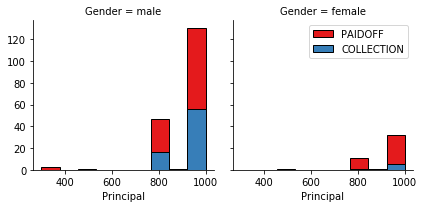

In [11]:
bins = np.linspace(df.Principal.min(),df.Principal.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec='k')
g.axes[-1].legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

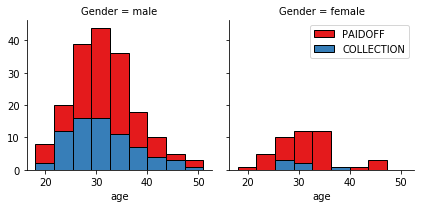

In [12]:
bins = np.linspace(df.age.min(),df.age.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'age',bins=bins,ec='k')
g.axes[-1].legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

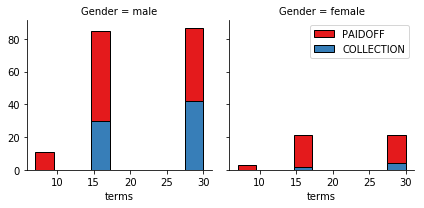

In [13]:
bins = np.linspace(df.terms.min(),df.terms.max(),10)
g=sns.FacetGrid(df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
g.map(plt.hist,'terms',bins=bins,ec='k')
g.axes[-1].legend()
plt.show

### lets analyse the day of the week people get loan

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


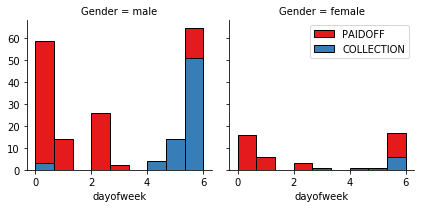

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

#### if we observe, generally loans are getting paid back before day 4 in a week

In [15]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if x>3 else 0)
df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4,1
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4,1
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5,1
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5,1
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5,1


### lets analyse the month people get loan

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


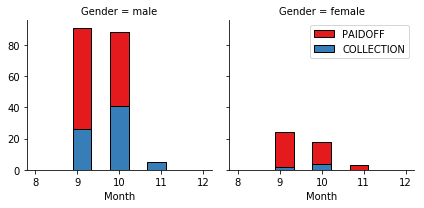

In [16]:
df['Month'] = df.due_date.dt.month
bins = np.linspace(df.Month.min()-1, df.Month.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### LOAN STATUS ON GENDER BASED

In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.882353
        COLLECTION     0.117647
male    PAIDOFF        0.717647
        COLLECTION     0.282353
Name: loan_status, dtype: float64

#### 88% of Female paid their loans
#### 71% of Male paid their loans

### CONVERTING CATEGORICAL FEATURES TO NUMERICAL VALUES:

In [18]:
df['Gender'].replace(to_replace=['male','female'],value=[0,1],inplace=True)
df

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Month
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,10
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,10
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,9
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,10
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,10
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,0,4,1,10
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1,10
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,0,5,1,9
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,0,5,1,9
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1,10


### Lets create a deadline column in days:

In [19]:
df['deadline']=df['due_date']-df['effective_date']
df['deadline']=df['deadline'].dt.days
df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Month,deadline
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,10,29
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,10,29
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,9,14
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,10,29
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,10,29
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,0,4,1,10,29
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1,10,29
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,0,5,1,9,14
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,0,5,1,9,6
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1,10,29


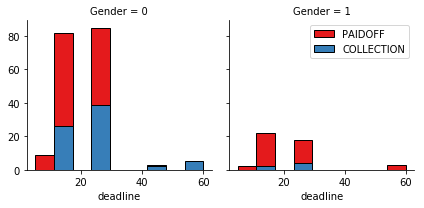

In [20]:
bins = np.linspace(df.deadline.min()-1, df.deadline.max()+1, 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'deadline', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [21]:
df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'],value=[0,1],inplace=True)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Month,deadline
0,1,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,10,29
1,1,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,10,29
2,1,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,9,14
3,1,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,10,29
4,1,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,10,29
5,1,1000,30,2016-09-09,2016-10-08,36,college,0,4,1,10,29
6,1,1000,30,2016-09-09,2016-10-08,28,college,0,4,1,10,29
7,1,800,15,2016-09-10,2016-09-24,26,college,0,5,1,9,14
8,1,300,7,2016-09-10,2016-09-16,29,college,0,5,1,9,6
9,1,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1,10,29


In [22]:
df.corr()

,loan_status,Principal,terms,age,Gender,dayofweek,weekend,Month,deadline
loan_status,1.000000,-0.084052,-0.121061,0.027922,0.140848,-0.425999,-0.457175,-0.137061,-0.149525
Principal,-0.084052,1.000000,0.503365,-0.040342,0.003886,0.121805,0.106961,0.472012,0.453413
terms,-0.121061,0.503365,1.000000,-0.042370,-0.016733,0.109512,0.086216,0.881956,0.767901
age,0.027922,-0.040342,-0.042370,1.000000,-0.027186,0.045141,0.006808,-0.118499,-0.122367
Gender,0.140848,0.003886,-0.016733,-0.027186,1.000000,-0.070629,-0.076871,-0.017993,-0.013435
dayofweek,-0.425999,0.121805,0.109512,0.045141,-0.070629,1.000000,0.962203,0.103743,0.094166
weekend,-0.457175,0.106961,0.086216,0.006808,-0.076871,0.962203,1.000000,0.085422,0.074536
Month,-0.137061,0.472012,0.881956,-0.118499,-0.017993,0.103743,0.085422,1.000000,0.954750
deadline,-0.149525,0.453413,0.767901,-0.122367,-0.013435,0.094166,0.074536,0.954750,1.000000


/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


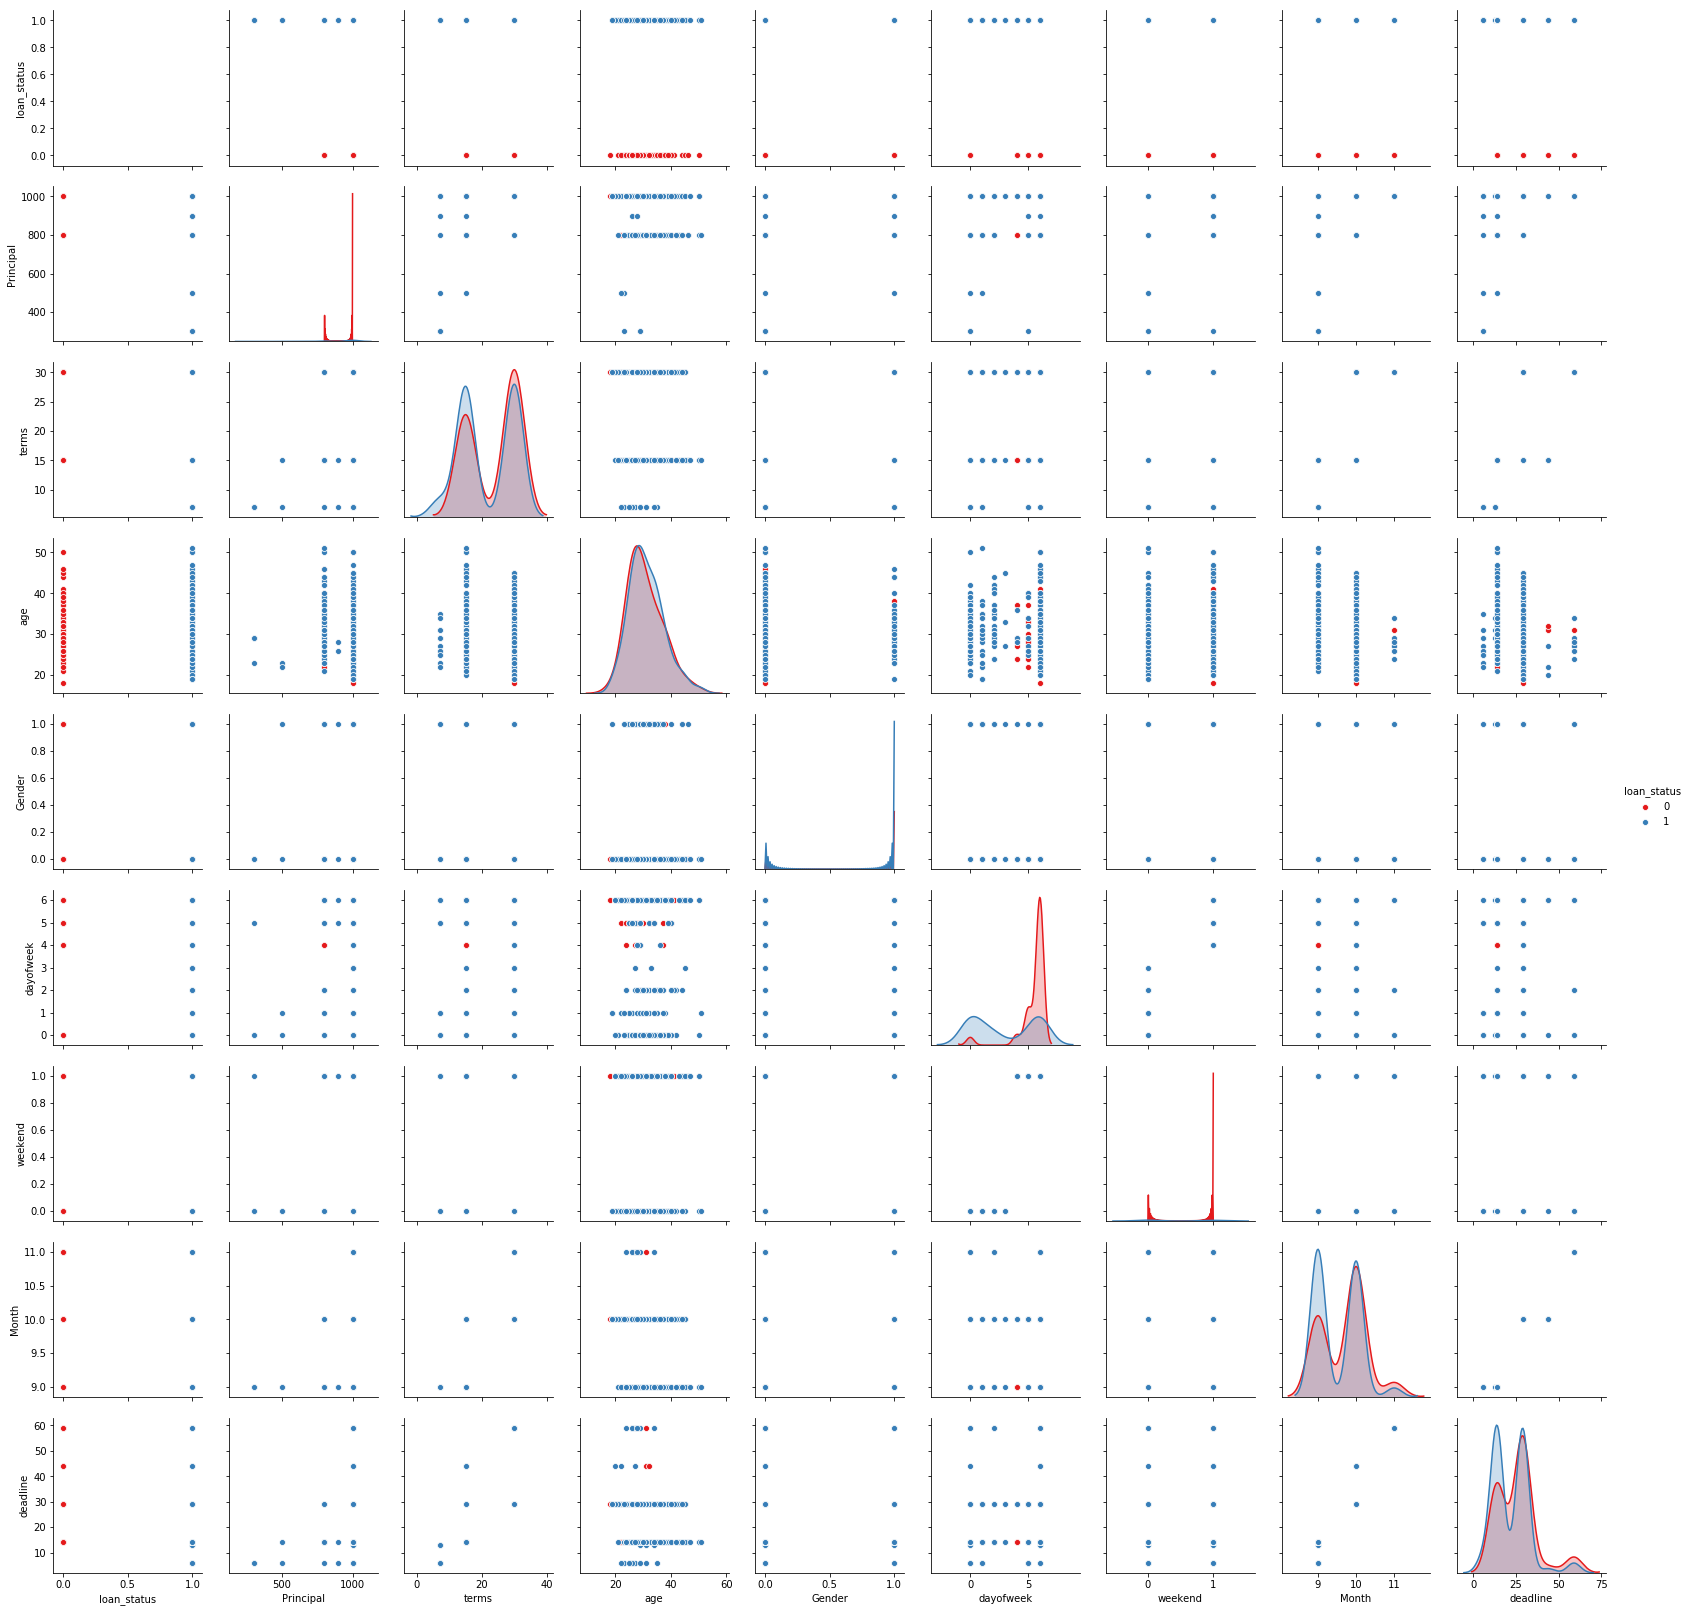

In [23]:
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df,vars=numeric_cols[:],hue='loan_status',palette='Set1')

#### Month and Deadline are ignored as it is tending to show that they wont effect much in loanstatus based of correlation value and pairplot

# ONE HOT ENCODING

### LETS FOCUS ON EDUCATION:

In [24]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              1              0.750000
                      0              0.250000
High School or Below  1              0.742188
                      0              0.257812
Master or Above       0              0.500000
                      1              0.500000
college               1              0.750000
                      0              0.250000
Name: loan_status, dtype: float64

In [25]:
len(df[df.education=='Master or Above'])

2

#### After observing the above information i am concluding that includig Masters or Above will not bring much effect on loan status

## Feature Selection:

In [26]:
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


## Labels alloted:

In [27]:
X = Feature
y=df['loan_status'].values

## Normalize Data:

In [28]:
X=preprocessing.StandardScaler().fit_transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.53003415,  0.97281823,  2.23550031, -0.4472136 , -1.16354895,
        -0.22561493, -0.40980353,  1.17924764, -0.87098834],
       [ 0.53003415,  0.97281823,  0.29443691,  2.23606798, -1.16354895,
        -0.22561493,  2.44019373, -0.8479983 , -0.87098834],
       [ 0.53003415, -0.89391909, -0.6760948 , -0.4472136 , -1.16354895,
        -0.22561493, -0.40980353, -0.8479983 ,  1.14812099],
       [ 0.53003415,  0.97281823, -0.51433951,  2.23606798,  0.85943956,
         0.15793045, -0.40980353, -0.8479983 ,  1.14812099],
       [ 0.53003415,  0.97281823, -0.35258423, -0.4472136 ,  0.85943956,
         0.15793045, -0.40980353, -0.8479983 ,  1.14812099]])

## TEST-TRAIN SPLIT:

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape,y_train.shape

((244, 9), (244,))

In [31]:
X_test.shape,y_test.shape

((62, 9), (62,))

# CLASSIFICATION MODEL DEVELOPMENT:

## K NEAREST NEIGHBOR (KNN):


In [129]:
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics  import  f1_score
import itertools
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

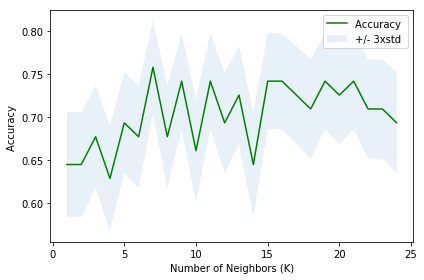

In [130]:
#We can calculate the accuracy of KNN for different Ks.
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [131]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


The best accuracy was with 0.7580645161290323 with k= 7


In [132]:
#Chosen model after tuning K
K=19
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train,y_train)
yhat=neigh.predict(X_test)
print("KNN model's Accuracy on test split: ", metrics.accuracy_score(y_test, yhat))


KNN model's Accuracy on test split:  0.7419354838709677


### Evaluation:

In [133]:
jaccard_similarity_score(y_test,yhat)

0.7419354838709677

In [134]:
f1_score(y_test,yhat,average='weighted')

0.7051348398596977

In [135]:
#Training the model one last time with all the data now
neigh = KNeighborsClassifier(n_neighbors = K).fit(X,y)


## DECISION TREE MODEL:

In [136]:
from sklearn.tree import DecisionTreeClassifier

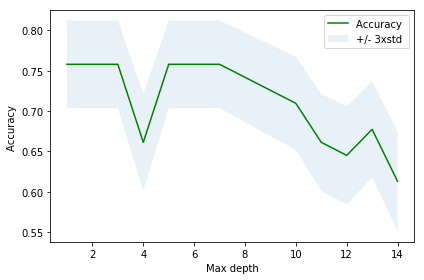

In [137]:
#We can calculate the accuracy of the decision tree for different depth.
max_depth = 15
mean_acc = np.zeros((max_depth-1))
std_acc = np.zeros((max_depth-1))
ConfustionMx = [];
for n in range(1,max_depth):
    
    #Train Model and Predict  
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    loanTree.fit(X_train,y_train)
    yhat = loanTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#Plot model accuracy for Different depth of the decision tree
plt.plot(range(1,max_depth),mean_acc,'g')
plt.fill_between(range(1,max_depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max depth')
plt.tight_layout()
plt.show()


In [138]:
#Chosen model
Treedepth = 5
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth=Treedepth)
loanTree.fit(X_train,y_train)
yhat = loanTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat), "with max_deph=",Treedepth)

DecisionTrees's Accuracy:  0.7580645161290323 with max_deph= 5


### Evaluation:

In [139]:
jaccard_similarity_score(y_test,yhat)

0.7580645161290323

In [140]:
f1_score(y_test,yhat,average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6537437111571471

In [141]:
#Training the model one last time with all the data now
loanTree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### VISUALISING DECISION TREE

In [41]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.14.1     |     pyh9f0ad1d_0          19 KB  conda-forge

The following NEW packages will be INSTALLED:

    python-graphviz: 0.14.1-pyh9f0ad1d_0 conda-forge


python-graphviz-0.14 | 19 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


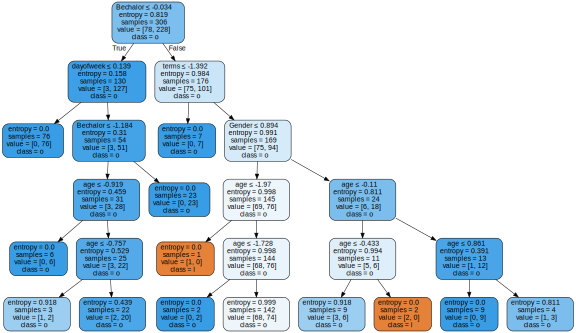

In [50]:
#This cell is the code for printing the decision tree

import graphviz 
import pydotplus
dot_data = tree.export_graphviz(loanTree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'Bechalor',
                                    'High School or Below',
                                    'college',
                                    'dayofweek',
                                   ],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(graph.to_string())
gvz_graph

## SUPPORT VECTOR MACHINE:

In [147]:
from sklearn import svm

In [148]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [149]:
#Chosen model
svmModel  =  svm.SVC(kernel='linear', gamma='scale')
svmModel.fit(X_train,  y_train)
yhat  =  svmModel.predict(X_test)

In [150]:
print('SVM model accuracy :', metrics.accuracy_score(y_test, yhat))

SVM model accuracy : 0.7580645161290323


### Evaluation:

In [151]:
jaccard_similarity_score(y_test,yhat)

0.7580645161290323

In [152]:
f1_score(y_test,yhat,average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6537437111571471

In [153]:
#Training the model one last time with all the data now
svmModel.fit(X,  y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## LOGISTIC REGRESSION:

In [154]:
from  sklearn.linear_model  import  LogisticRegression

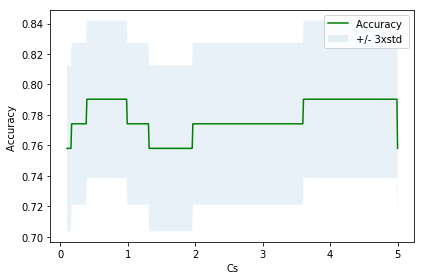

In [155]:
#We can calculate the accuracy of the Logistic regression model for different Cs.
N =500
Cs=np.linspace(0.1, 5,N)
mean_acc = np.zeros((N))
std_acc = np.zeros((N))
ConfustionMx = [];
for i,n in enumerate(Cs):
    
    #Train Model and Predict  
    LR  =  LogisticRegression(C=n,  solver='liblinear').fit(X_train,y_train)
    yhat  =  LR.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
#Plot model accuracy for Different Cs of the logistic regression
plt.plot(Cs,mean_acc,'g')
plt.fill_between(Cs,mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Cs')
plt.tight_layout()
plt.show()

In [156]:
#Chosen model after tuning C
C=0.6
LR  =  LogisticRegression(C=C,  solver='liblinear').fit(X_train,y_train)
yhat  =  LR.predict(X_test)
yhat_prob  =  LR.predict_proba(X_test)
print("Logistic regression's Accuracy: ", metrics.accuracy_score(y_test, yhat), "with C=",C)

Logistic regression's Accuracy:  0.7903225806451613 with C= 0.6


### Evaluation:

In [157]:
jaccard_similarity_score(y_test,yhat)

0.7903225806451613

In [158]:
f1_score(y_test,yhat,average='weighted')

0.7656811964506408

In [159]:
log_loss(y_test,yhat_prob)

0.4311553878562052

# CONCLUSION:

### 1.KNN,Decision tree classifier,SVM,LogisticRegression algorithms are performed on the dataset
### 2.Performed DataCleaning and Data Visualization on different features of dataset
### 3.Evaluated each model with Jaccard_similarity_score,f1_score or logloss(if applicable)
### 4.After overall analysis it has been shown that Logistic Regression model fits the data well with better accuracy values